<div style="background-color: #058212; border-radius: 20px; color: #fff; font-weight: bold; padding: 10px; text-align:center">
    <h1>Análisis completo de distribuciones y outliers en dataset financiero</h1>
</div>

<div style="font-weight: bold; color:#058212 ; border-width: 0 0 3px 0; border-style: solid; border-color: #058212; padding: 3px; ">
    <h2>Cargar librerías</h2>
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from pathlib import Path

actual_dir = Path.cwd()
ruta_outputs = actual_dir.parent / "outputs" / "outputs_dia_3"

ruta_outputs.mkdir(parents=True, exist_ok=True)
print(f"Carpeta creada")

Carpeta creada


<div style="font-weight: bold; color:#058212 ; border-width: 0 0 3px 0; border-style: solid; border-color: #058212; padding: 3px; ">
    <h2>Crear y explorar dataset financiero</h2>
</div>

In [2]:
# Crear dataset de transacciones financieras
np.random.seed(42)
n_transacciones = 2000

# Transacciones normales (distribución normal)
transacciones_normales = np.random.normal(150, 50, n_transacciones//2)

# Transacciones de lujo (distribución log-normal)
transacciones_lujo = np.random.lognormal(5.5, 0.8, n_transacciones//2)

# Combinar datasets
montos = np.concatenate([transacciones_normales, transacciones_lujo])

# Crear DataFrame
df = pd.DataFrame({
    'id_transaccion': range(1, len(montos) + 1),
    'monto': np.round(montos, 2),
    'tipo_cliente': np.random.choice(['Regular', 'Premium', 'VIP'], len(montos)),
    'categoria': np.random.choice(['Alimentos', 'Electrónicos', 'Ropa', 'Servicios'], len(montos))
})

print(f"Dataset creado: {len(df)} transacciones")
print(f"Rango de montos: ${df['monto'].min():.2f} - ${df['monto'].max():.2f}")

Dataset creado: 2000 transacciones
Rango de montos: $-12.06 - $3147.88


<div style="font-weight: bold; color:#058212 ; border-width: 0 0 3px 0; border-style: solid; border-color: #058212; padding: 3px; ">
    <h2>Análisis de distribuciones y medidas de forma</h2>
</div>

In [3]:
# Estadísticos descriptivos
print("ANÁLISIS DESCRIPTIVO")
print("=" * 25)
print(df['monto'].describe())

# Medidas de forma
print("\nMEDIDAS DE FORMA")
print("=" * 20)
skewness = df['monto'].skew()
kurtosis = df['monto'].kurtosis()

print(f"Asimetría (Skewness): {skewness:.3f}")
print(f"  Interpretación: {'Sesgo positivo (cola derecha)' if skewness > 0 else 'Sesgo negativo (cola izquierda)' if skewness < 0 else 'Simétrica'}")

print(f"Curtosis: {kurtosis:.3f}")
print(f"  Interpretación: {'Leptocúrtica (colas pesadas)' if kurtosis > 0 else 'Platicúrtica (colas ligeras)' if kurtosis < 0 else 'Mesocúrtica (normal)'}")

# Comparación media vs mediana
media = df['monto'].mean()
mediana = df['monto'].median()

print(f"\nMedia: ${media:.2f}")
print(f"Mediana: ${mediana:.2f}")
print(f"Diferencia: ${media - mediana:.2f} ({((media - mediana) / mediana * 100):.1f}%)")

ANÁLISIS DESCRIPTIVO
count    2000.000000
mean      252.769495
std       252.807549
min       -12.060000
25%       126.240000
50%       175.125000
75%       262.682500
max      3147.880000
Name: monto, dtype: float64

MEDIDAS DE FORMA
Asimetría (Skewness): 4.014
  Interpretación: Sesgo positivo (cola derecha)
Curtosis: 25.445
  Interpretación: Leptocúrtica (colas pesadas)

Media: $252.77
Mediana: $175.12
Diferencia: $77.64 (44.3%)


<div style="font-weight: bold; color:#058212 ; border-width: 0 0 3px 0; border-style: solid; border-color: #058212; padding: 3px; ">
    <h2>Detección de outliers con múltiples métodos</h2>
</div>

In [4]:
# Método IQR
Q1 = df['monto'].quantile(0.25)
Q3 = df['monto'].quantile(0.75)
IQR = Q3 - Q1

limite_inf_iqr = Q1 - 1.5 * IQR
limite_sup_iqr = Q3 + 1.5 * IQR

outliers_iqr = df[(df['monto'] < limite_inf_iqr) | (df['monto'] > limite_sup_iqr)]

# Método Z-Score
z_scores = stats.zscore(df['monto'])
outliers_zscore = df[abs(z_scores) > 3]

print("\nDETECCIÓN DE OUTLIERS")
print("=" * 25)
print(f"Método IQR: {len(outliers_iqr)} outliers")
print(f"  Límite inferior: ${limite_inf_iqr:.2f}")
print(f"  Límite superior: ${limite_sup_iqr:.2f}")

print(f"\nMétodo Z-Score (|z| > 3): {len(outliers_zscore)} outliers")

# Comparar métodos
outliers_comunes = set(outliers_iqr.index) & set(outliers_zscore.index)
print(f"Outliers detectados por ambos métodos: {len(outliers_comunes)}")


DETECCIÓN DE OUTLIERS
Método IQR: 229 outliers
  Límite inferior: $-78.42
  Límite superior: $467.35

Método Z-Score (|z| > 3): 41 outliers
Outliers detectados por ambos métodos: 41


<div style="font-weight: bold; color:#058212 ; border-width: 0 0 3px 0; border-style: solid; border-color: #058212; padding: 3px; ">
    <h2>Análisis por categorías</h2>
</div>

In [5]:
print("\nANÁLISIS POR CATEGORÍA")
print("=" * 25)

categoria_stats = df.groupby('categoria').agg({
    'monto': ['count', 'mean', 'median', 'std', 'skew', stats.kurtosis]
}).round(3)

print(categoria_stats)

# Análisis por tipo de cliente
print("\nANÁLISIS POR TIPO DE CLIENTE")
print("=" * 30)

cliente_stats = df.groupby('tipo_cliente').agg({
    'monto': ['count', 'mean', 'median', 'skew']
}).round(2)

print(cliente_stats)


ANÁLISIS POR CATEGORÍA
             monto                                           
             count     mean   median      std   skew kurtosis
categoria                                                    
Alimentos      482  262.608  182.595  243.438  2.907   10.566
Electrónicos   514  247.375  173.040  250.737  4.687   35.216
Ropa           528  260.260  174.835  292.607  4.359   26.769
Servicios      476  240.323  172.460  213.819  2.987   12.690

ANÁLISIS POR TIPO DE CLIENTE
             monto                      
             count    mean  median  skew
tipo_cliente                            
Premium        650  251.22  173.57  3.39
Regular        676  247.64  175.92  4.68
VIP            674  259.41  177.86  4.06


<div style="font-weight: bold; color:#058212 ; border-width: 0 0 3px 0; border-style: solid; border-color: #058212; padding: 3px; ">
    <h2>Visualización básica de distribuciones</h2>
</div>


Gráfico guardado como 'distribucion_montos.png'


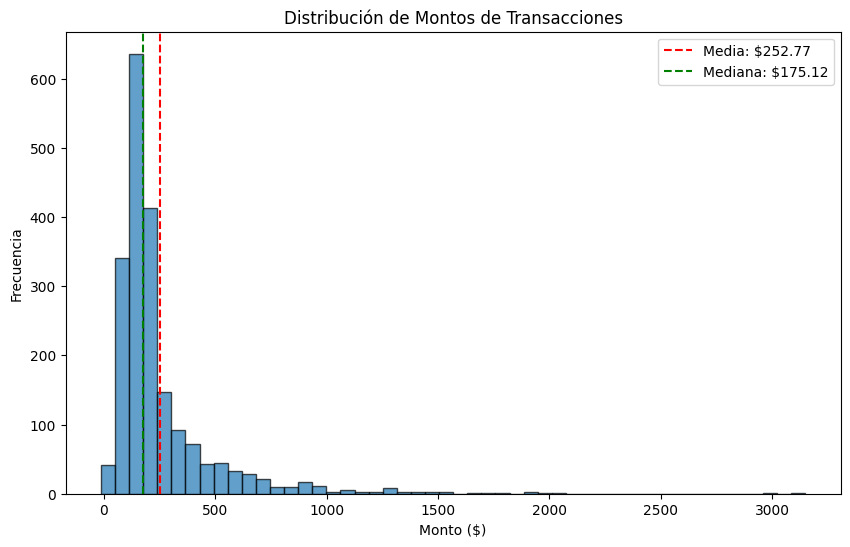

In [6]:
# Histograma simple (si matplotlib está disponible)
try:
    plt.figure(figsize=(10, 6))
    plt.hist(df['monto'], bins=50, alpha=0.7, edgecolor='black')
    plt.axvline(df['monto'].mean(), color='red', linestyle='--', label=f'Media: ${df["monto"].mean():.2f}')
    plt.axvline(df['monto'].median(), color='green', linestyle='--', label=f'Mediana: ${df["monto"].median():.2f}')
    plt.title('Distribución de Montos de Transacciones')
    plt.xlabel('Monto ($)')
    plt.ylabel('Frecuencia')
    plt.legend()
    plt.savefig(ruta_outputs / 'distribucion_montos.png', dpi=100, bbox_inches='tight')
    print("\nGráfico guardado como 'distribucion_montos.png'")
except ImportError:
    print("\nMatplotlib no disponible - omitiendo visualización")

<div style="font-weight: bold; color:#058212 ; border-width: 0 0 3px 0; border-style: solid; border-color: #058212; padding: 3px; ">
    <h2>Análisis</h2>
</div>

Explica cómo la asimetría y curtosis afectan la interpretación de medidas de tendencia central, y justifica por qué algunos outliers pueden ser transacciones válidas de clientes premium.

Para comenzar el análisis vamos a graficar la distribución de los montos de transacciones considerando todos los clientes y cada uno de los segmentos, para observar sus diferencias.

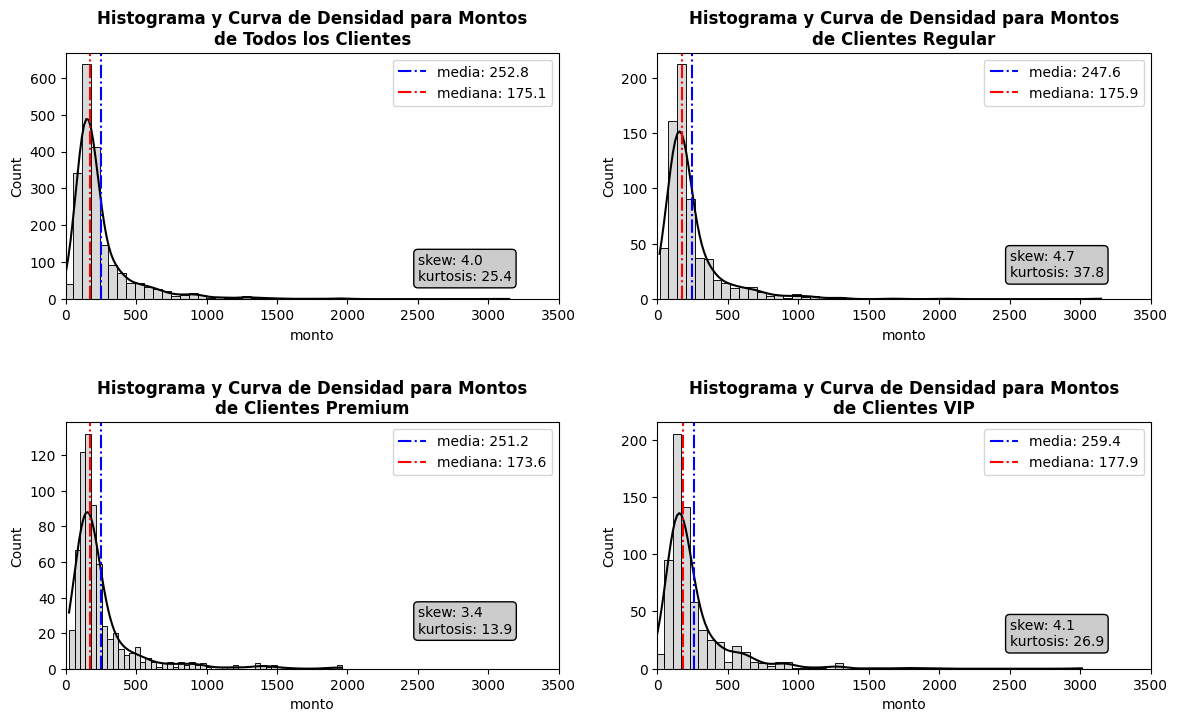

In [7]:
def graficar_distribuciones(df, col_cliente):

    fig, axs = plt.subplots(2,2, figsize=(14,8))
    axs = axs.flatten()
    
    bins = 50
    ax = axs[0]
    dfc = df['monto']
    sns.histplot(dfc, kde=True, color='k', ax=ax, alpha=0.15, bins=bins)
    ax.axvline(dfc.mean(), label=f'media: {dfc.mean():.1f}', color='blue', linestyle='dashdot')
    ax.axvline(dfc.median(), label=f'mediana: {dfc.median():.1f}', color='red', linestyle='dashdot')
    ax.annotate(f'skew: {dfc.skew():.1f}\nkurtosis: {dfc.kurt():.1f}', 
                xy=(0, 0),        
                xytext=(2500, 50),   
                bbox=dict(boxstyle="round", fc="0.8"))
    ax.set_title(f'Histograma y Curva de Densidad para Montos\nde Todos los Clientes', weight='bold', size=12)
    ax.set_xlim(0, 3500)
    ax.legend()
    
    for i, col in enumerate(['Regular', 'Premium', 'VIP']):
        ax = axs[i+1]
        dfc = df.loc[df[col_cliente]==col, 'monto']
        sns.histplot(dfc, kde=True, color='k', ax=ax, alpha=0.15, bins=bins)
        ax.axvline(dfc.mean(), label=f'media: {dfc.mean():.1f}', color='blue', linestyle='dashdot')
        ax.axvline(dfc.median(), label=f'mediana: {dfc.median():.1f}', color='red', linestyle='dashdot')
        ax.annotate(f'skew: {dfc.skew():.1f}\nkurtosis: {dfc.kurt():.1f}', 
                xy=(0, 0),        
                xytext=(2500, 20),   
                bbox=dict(boxstyle="round", fc="0.8"))
        ax.set_title(f'Histograma y Curva de Densidad para Montos\nde Clientes {col}', weight='bold', size=12)
        ax.set_xlim(0, 3500)
        ax.legend()
    
    plt.subplots_adjust(hspace=0.5, wspace=0.2) 
    plt.show()

graficar_distribuciones(df, col_cliente='tipo_cliente')

Vemos que todas las distribuciones se parecen demasiado como para asumir que provienen de distribuciones distintas, lo cual fue causado por la asignación de tipos de cliente de manera completamente aleatoria.

En todo caso, vamos a analizarlo estadísticamente usando el test de hipótesis de Anderson Darling para k muestras, cuya hipótesis nula dice que las k muestras provienen de la misma población sin tener que especificar la función de distribución de esa población [(scipy.stats)](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.anderson_ksamp.html) 

In [8]:
def test_hipotesis(df, col_cliente):
    
    all_data = df['monto'].values
    
    alpha = 0.05 # establecer nivel de significancia
    method = stats.PermutationMethod(n_resamples=9999, rng=np.random.default_rng(0)) # para evitar UserWarning: p-value capped
    for seg in ['Regular', 'Premium', 'VIP']:
        print(f'\n=== Test Anderson–Darling: TODOS LOS CLIENTES vs CLIENTE {seg.upper()} ===')
        
        seg_data = df[df[col_cliente] == seg]['monto'].values
        res = stats.anderson_ksamp([all_data, seg_data], method=method)
        
        if res.pvalue < alpha:
            print(f'p-value: {res.pvalue:.2f} --> Las dos muestras no provienen de la misma población')
        else:
            print(f'p-value: {res.pvalue:.2f} --> No se descarta que las dos muestras provengan de la misma población')
    
    
    print(f'\n=== Test Anderson–Darling comparando la distribución entre los tres segmentos de clientes ===')
    
    res = stats.anderson_ksamp([df[df[col_cliente]=='Regular']['monto'].values, 
                                df[df[col_cliente]=='Premium']['monto'].values, 
                                df[df[col_cliente]=='VIP']['monto']], method=method)
    
    if res.pvalue < alpha:
        print(f'p-value: {res.pvalue:.2f} --> Las tres muestras no provienen de la misma población')
    else:
        print(f'p-value: {res.pvalue:.2f} --> No se descarta que las tres muestras provengan de la misma población')


test_hipotesis(df, col_cliente='tipo_cliente')


=== Test Anderson–Darling: TODOS LOS CLIENTES vs CLIENTE REGULAR ===
p-value: 1.00 --> No se descarta que las dos muestras provengan de la misma población

=== Test Anderson–Darling: TODOS LOS CLIENTES vs CLIENTE PREMIUM ===
p-value: 0.79 --> No se descarta que las dos muestras provengan de la misma población

=== Test Anderson–Darling: TODOS LOS CLIENTES vs CLIENTE VIP ===
p-value: 0.83 --> No se descarta que las dos muestras provengan de la misma población

=== Test Anderson–Darling comparando la distribución entre los tres segmentos de clientes ===
p-value: 0.66 --> No se descarta que las tres muestras provengan de la misma población


**Interpretación:**  
Dado que en todos los casos los p-values son ampliamente mayores que α = 0.05, no existe evidencia estadística significativa para rechazar la hipótesis nula de que todas las muestras provienen de la misma distribución, lo que confirma empíricamente que los tipos de cliente no tienen patrones estadísticos distintos porque fueron asignados al azar. Incluso los pequeños desbalances de media, mediana, skew o kurtosis se deben únicamente al ruido normal en muestras diferentes.

Analicemos ahora las diferencias entre los outliers de la población total y la del segmento de clientes Premium usando el método IQR.

In [9]:
def obtener_estadísticas_y_outliers(df, col_cliente, cliente='Premium'):

    def frontera_outliers_iqr(x):
        Q1 = x.quantile(0.25)
        Q3 = x.quantile(0.75)
        IQR = Q3 - Q1
        
        limite_inf_iqr = Q1 - 1.5 * IQR
        limite_sup_iqr = Q3 + 1.5 * IQR
        
        outliers = x[(x < limite_inf_iqr) | (x > limite_sup_iqr)]
        return pd.Series({
            'limite_inf_iqr': round(limite_inf_iqr, 2),
            'limite_sup_iqr': round(limite_sup_iqr, 2),
            'numero_outliers_iqr': len(outliers),
            'index_outliers_iqr': outliers.index
        })
    
    monto_stats_todos = df['monto'].agg(
        ['count', 'mean', 'median', 'std', 'skew', 'kurt']
    ).round(2)
    
    outlier_stats_todos = frontera_outliers_iqr(df['monto'])
    monto_stats_todos = pd.concat([monto_stats_todos, outlier_stats_todos])
    
    monto_stats_todos.rename(index={'kurt':'kurtosis'}, inplace=True)
    monto_stats_todos.rename('Todos_los_Clientes', inplace=True)
    
    monto_stats_cliente = df.loc[df[col_cliente]==cliente, 'monto'].agg(
        ['count', 'mean', 'median', 'std', 'skew', 'kurt']
    ).round(2)
    
    outlier_stats_cliente = frontera_outliers_iqr(df.loc[df[col_cliente]==cliente, 'monto'])
    monto_stats_cliente = pd.concat([monto_stats_cliente, outlier_stats_cliente])
    
    monto_stats_cliente.rename(index={'kurt':'kurtosis'}, inplace=True)
    monto_stats_cliente.rename(f'Clientes_{cliente}', inplace=True)
    
    df_stats = pd.concat([monto_stats_todos, monto_stats_cliente], axis=1)
    
    print(f'COMPARACIÓN DE ESTADÍSTICOS ENTRE TODOS LOS CLIENTES Y LOS DEL SEGMENTO {cliente.upper()}')
    print('='*85)
    display(df_stats)
    
    # Outliers en común en los montos de las transacciones para "Todos los Clientes" y los del segmento "Premium".
    
    outliers_todos_idx = set(df_stats.loc['index_outliers_iqr', 'Todos_los_Clientes'])
    outliers_cliente_idx = set(df_stats.loc['index_outliers_iqr', f'Clientes_{cliente}'])
    
    outliers_en_comun_idx = outliers_todos_idx & outliers_cliente_idx
    
    print(f'Número de Outliers en montos para "Todos los Clientes": {len(outliers_todos_idx)}')
    print(f'Número de Outliers en montos para Clientes "{cliente}": {len(outliers_cliente_idx)}')
    print(f'Número de Outliers en común para "Todos los Clientes" y los del segmento "{cliente}": {len(outliers_en_comun_idx)}')

    return outliers_todos_idx, outliers_cliente_idx, outliers_en_comun_idx, df_stats

In [10]:
outliers_todos_idx, outliers_premium_idx, outliers_en_comun_idx, _ = obtener_estadísticas_y_outliers(df, col_cliente='tipo_cliente', cliente='Premium')

COMPARACIÓN DE ESTADÍSTICOS ENTRE TODOS LOS CLIENTES Y LOS DEL SEGMENTO PREMIUM


,Todos_los_Clientes,Clientes_Premium
count,2000.0,650.0
mean,252.77,251.22
median,175.12,173.57
std,252.81,257.51
skew,4.01,3.39
kurtosis,25.44,13.92
limite_inf_iqr,-78.42,-66.05
limite_sup_iqr,467.35,440.42
numero_outliers_iqr,229,79
index_outliers_iqr,"Index([1000, 1001, 1006, 1008, 1010, 1012, 101...","Index([1006, 1023, 1040, 1045, 1057, 1060, 111..."


Número de Outliers en montos para "Todos los Clientes": 229
Número de Outliers en montos para Clientes "Premium": 79
Número de Outliers en común para "Todos los Clientes" y los del segmento "Premium": 70


Vemos que la mayoría de los outliers del segmento Premium (70 de 79) también aparecen como outliers cuando se considera a todos los clientes.

Revisemos si los outliers exclusivos del segmento "Premium" están por encima o por debajo del rango definido por el IQR de todos los clientes.

In [11]:
# Revisar si los outliers exclusivos del segmento "Premium" están por encima o por debajo del rango definido por el IQR de todos los clientes 

outliers_exclusivos_premium_idx = outliers_premium_idx - outliers_en_comun_idx

print(f'Valores máximo y mínimo de los outliers exclusivos del segmento "Premium":')
df.loc[df.index.isin(outliers_exclusivos_premium_idx), 'monto'].agg(['min', 'max'])

Valores máximo y mínimo de los outliers exclusivos del segmento "Premium":


min    441.19
max    464.03
Name: monto, dtype: float64

El valor máximo de estos outliers exclusivos (464.03) es inferior al límite superior del IQR calculado para todos los clientes (467.35). Por lo tanto, se concluye que el segmento Premium clasifica como outliers algunos montos que, en la distribución general, no son considerados atípicos.

Esto no es lo que esperábamos encontrar al principio de la actividad -que algunos outliers pueden ser transacciones válidas de clientes premium-, y tiene origen en la asignación aleatoria de clientes.

Para un mejor análisis, voy a reclasificar clientes, pero con un patrón aleatorio no uniforme.

<div style="font-weight: bold; color:#058212 ; border-width: 0 0 3px 0; border-style: solid; border-color: #058212; padding: 3px; ">
    <h2>Reclasificación de Clientes</h2>
</div>

In [12]:
# reclasificar clientes

def asignar_segmento(monto):
    if monto < df['monto'].median():
        return np.random.choice(['Regular', 'Premium', 'VIP'], p=[0.75, 0.2, 0.05])
    elif monto < df['monto'].quantile(0.9):
        return np.random.choice(['Regular', 'Premium', 'VIP'], p=[0.2, 0.6, 0.2])
    else:
        return np.random.choice(['Regular', 'Premium', 'VIP'], p=[0.05, 0.1, 0.85])

df['segmento'] = df['monto'].map(asignar_segmento)

df.segmento.value_counts()

segmento
Regular    915
Premium    685
VIP        400
Name: count, dtype: int64

In [13]:
numero_clientes_premium = df.segmento[df.segmento=='Premium'].count()
print(f'Número de clientes del segmento "Premium": {numero_clientes_premium}')

Número de clientes del segmento "Premium": 685


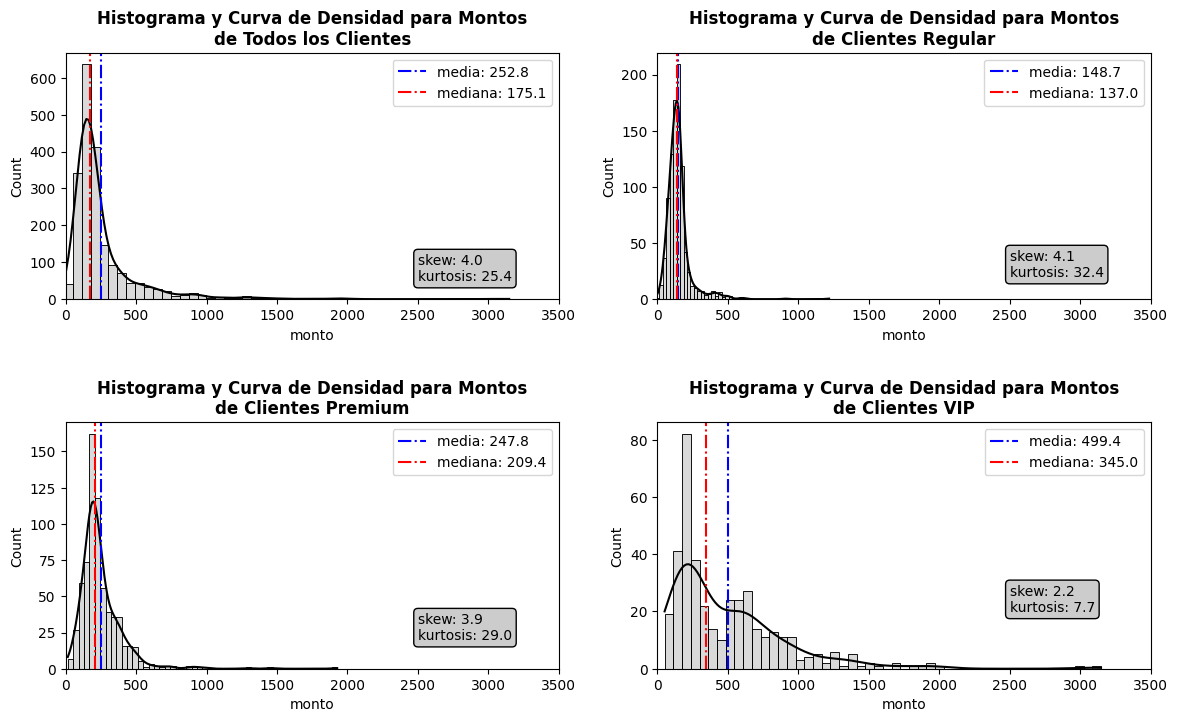

In [14]:
graficar_distribuciones(df, col_cliente='segmento')

In [15]:
# Verificamos que todas las muestras provengan de poblaciones diferentes

test_hipotesis(df, col_cliente='segmento')


=== Test Anderson–Darling: TODOS LOS CLIENTES vs CLIENTE REGULAR ===
p-value: 0.00 --> Las dos muestras no provienen de la misma población

=== Test Anderson–Darling: TODOS LOS CLIENTES vs CLIENTE PREMIUM ===
p-value: 0.00 --> Las dos muestras no provienen de la misma población

=== Test Anderson–Darling: TODOS LOS CLIENTES vs CLIENTE VIP ===
p-value: 0.00 --> Las dos muestras no provienen de la misma población

=== Test Anderson–Darling comparando la distribución entre los tres segmentos de clientes ===
p-value: 0.00 --> Las tres muestras no provienen de la misma población


In [16]:
outliers_todos_idx, outliers_premium_idx, outliers_en_comun_idx, df_stats = obtener_estadísticas_y_outliers(df, col_cliente='segmento', cliente='Premium')

COMPARACIÓN DE ESTADÍSTICOS ENTRE TODOS LOS CLIENTES Y LOS DEL SEGMENTO PREMIUM


,Todos_los_Clientes,Clientes_Premium
count,2000.0,685.0
mean,252.77,247.79
median,175.12,209.36
std,252.81,156.13
skew,4.01,3.94
kurtosis,25.44,29.03
limite_inf_iqr,-78.42,-13.11
limite_sup_iqr,467.35,475.93
numero_outliers_iqr,229,39
index_outliers_iqr,"Index([1000, 1001, 1006, 1008, 1010, 1012, 101...","Index([1045, 1120, 1132, 1136, 1154, 1169, 118..."


Número de Outliers en montos para "Todos los Clientes": 229
Número de Outliers en montos para Clientes "Premium": 39
Número de Outliers en común para "Todos los Clientes" y los del segmento "Premium": 39


**Outliers en las distribuciones:**
- La distribución de "Todos los Clientes" tiene 229 outliers según el método IQR.
- El segmento "Premium" tiene 39 outliers.
- Los 39 outliers Premium también están presentes en el conjunto de outliers de "Todos los Clientes".

Esto significa que no existen outliers exclusivos del segmento Premium: todos coinciden con los detectados a nivel global.

In [17]:
# ouliers presentes la distribución de todos los clientes pero no en la del segmento "Premium"

outliers_exclusivos_todos_idx = outliers_todos_idx - outliers_en_comun_idx 
df.loc[(df.segmento=='Premium') & (df.index.isin(outliers_exclusivos_todos_idx)), ['monto', 'segmento']].sort_values('monto')

,monto,segmento
1431,469.93,Premium
1311,470.70,Premium


**Outliers exclusivos de la distribución de todos los clientes:**
- Se identificaron 2 outliers que aparecen como tales en la distribución global pero no en la distribución del segmento Premium.
- Estos valores superan el límite superior IQR general (467.35), pero no superan el límite superior IQR Premium (475.93)

Esto refleja que el segmento Premium admite valores relativamente más altos antes de ser considerados outliers, debido a su mayor concentración de valores altos.

In [18]:
display(df_stats[df_stats.index.isin(['mean', 'median', 'skew', 'kurtosis'])])
print('\nDiferencia entre media y mediana para:')
print(f"  - Distribución de \"todos los clientes\": {(df_stats.loc['mean', 'Todos_los_Clientes'] - df_stats.loc['median', 'Todos_los_Clientes']):.2f}")
print(f"  - Distribución de \"clientes Premium\": {(df_stats.loc['mean', 'Clientes_Premium'] - df_stats.loc['median', 'Clientes_Premium']):.2f}")

,Todos_los_Clientes,Clientes_Premium
mean,252.77,247.79
median,175.12,209.36
skew,4.01,3.94
kurtosis,25.44,29.03



Diferencia entre media y mediana para:
  - Distribución de "todos los clientes": 77.65
  - Distribución de "clientes Premium": 38.43


**Análisis de Estadísticos Descriptivos:**
- Ambas distribuciones son asimétricas a la derecha (media > mediana).
- La distribución de "Todos los Clientes" es más asimétrica, lo que sugiere la presencia de valores extremos más grandes o más frecuentes que tiran la media hacia arriba.
- Ambas distribuciones son leptocúrticas, con una fuerte concentración de valores alrededor de la media, colas "pesadas" con outliers importantes.
- La curtosis de la distribución "Premium" (29.03) es mayor que la de "Todos los Clientes" (25.44), lo que indica que los datos "Premium" están más agrupados cerca de la media, pero cuentan con colas incluso más pesadas.

**Conclusión final:**  
- Las distribuciones de montos tanto para "Todos los Clientes" como para el segmento "Premium" muestran fuerte asimetría y alta curtosis, lo que evidencia la presencia de valores extremos.
- Aunque ambas distribuciones comparten características de forma similares, la distribución "Premium" muestra una mayor concentración central y colas más pesadas. Si el límite superior del IQR del segmento Premium es más alto, se debe a que los valores intrínsecos de ese segmento son mayores, Por ello, el método del IQR clasifica algunos valores como atípicos considerando todos los clientes, pero como valores normales dentro del segmento Premium.